# Contents

import libraries and data

plot data

Set the "Date" column as the index

Decompose the time series using an additive model

Dickey-Fuller test to check for stationarity

Differencing

# Import libraries and data

In [105]:
conda install quandl

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [106]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [107]:
quandl.ApiConfig.api_key = '4iwwiXSBxYPagtc6adzu'

In [108]:
#real GDP data
data = quandl.get('FRED/GDPC1')

In [109]:
data.head()

,Value
Date,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442


In [110]:
data.shape

(300, 1)

In [111]:
# Reset index to check data

data_2 = data.reset_index()

In [112]:
data_2.describe()

,Date,Value
count,300,300.000000
mean,1984-05-16 13:31:12,8960.892763
min,1947-01-01 00:00:00,2024.834000
25%,1965-09-08 00:00:00,4280.493750
50%,1984-05-16 12:00:00,7654.266000
75%,2003-01-23 12:00:00,13649.852250
max,2021-10-01 00:00:00,19805.962000
std,NaN,5347.900752


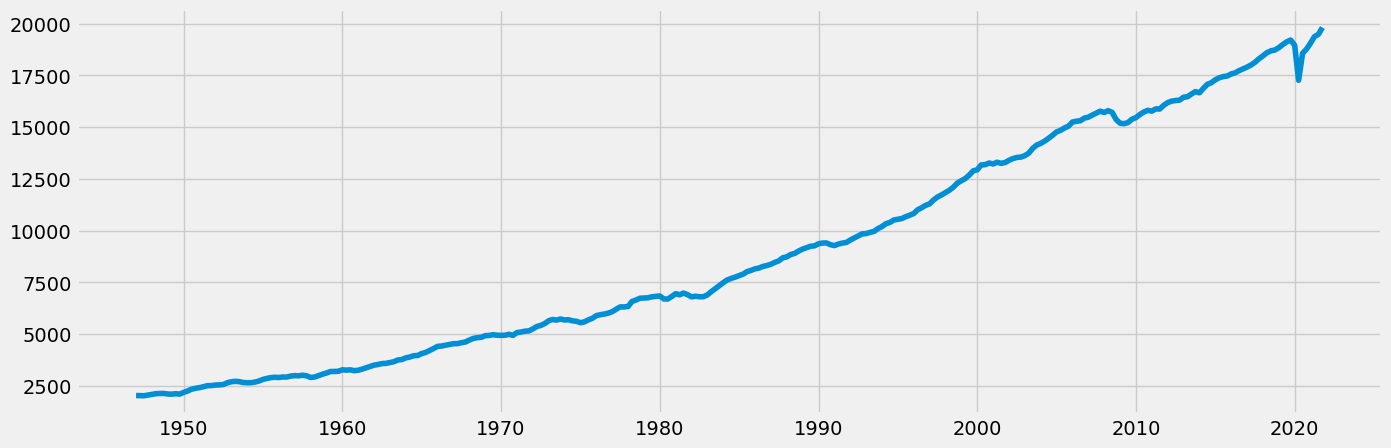

In [113]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

# Decompose data

In [115]:
data_2.head()

,Date,Value
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442


In [116]:
# Set the "Date" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['Date']) # Create a datetime column from "Date.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

,Value
datetime,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442


In [117]:
data_2.isnull().sum()
# no nulls

Value    0
dtype: int64

In [118]:
data_2.duplicated().sum()
#no dupes

0

# Decompose the time series using an additive model

In [120]:
decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [121]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

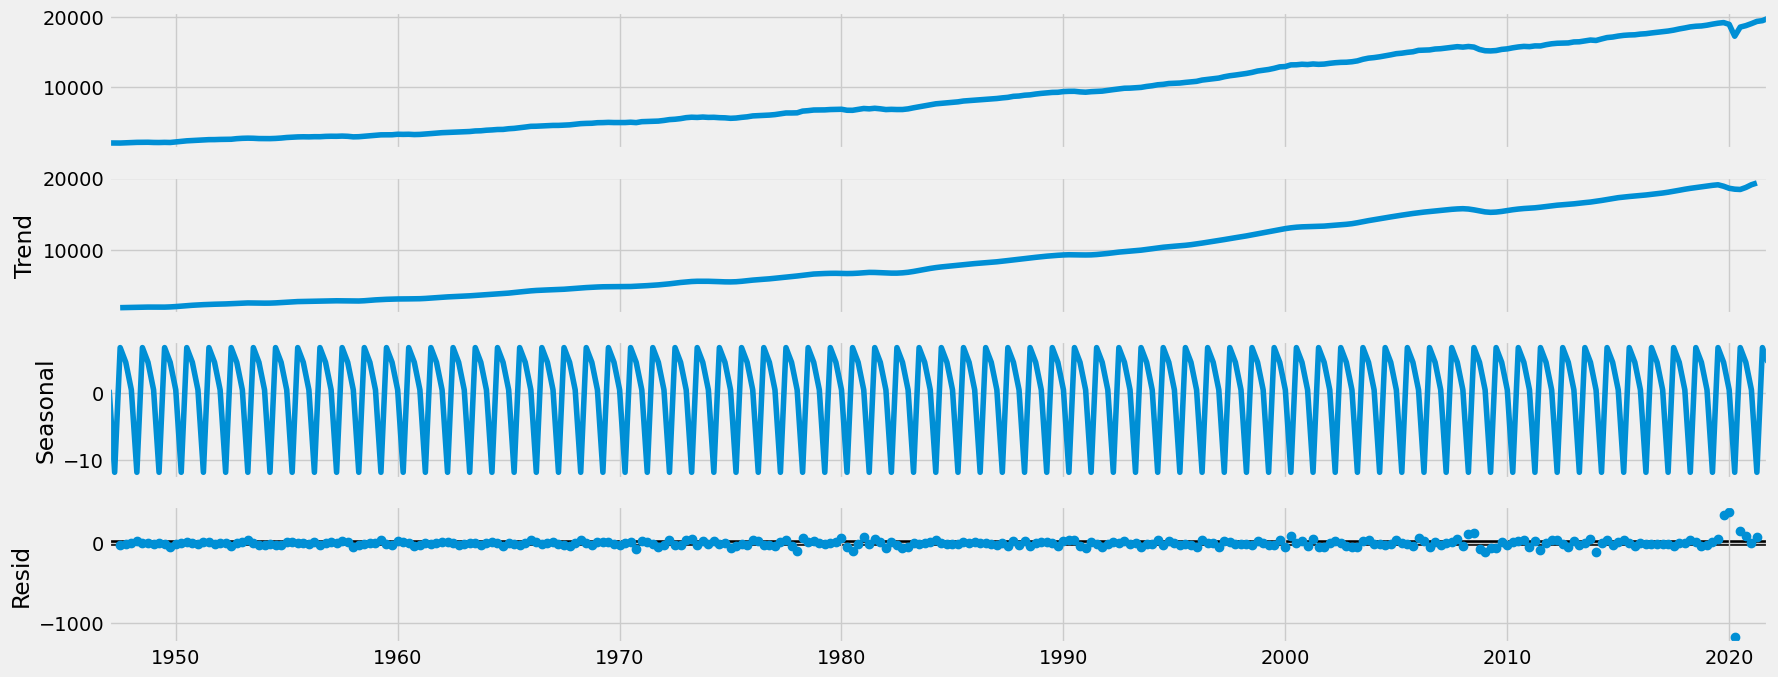

In [122]:
# Plot the separate components

decomposition.plot()
plt.show()

# Results

- The level and trend appear the same, indicating that the data is smoothed. 
- The trend gradually increases from 1950 to 2021, with a slight dip in 2020. Givn the overal trend is increasing, this
is a dominant trend. 
- The seasonality shows a spikey curve that changes at a regular interval, indicating seasonality.
- Lastly the residual/noise is shown at the bottom. Nothing stands out here as the data was smoothed. 

# Dickey-Fuller test to check for stationarity

In [126]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function


In [127]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.766020
p-value                          1.000000
Number of Lags Used              1.000000
Number of Observations Used    298.000000
Critical Value (1%)             -3.452486
Critical Value (5%)             -2.871288
Critical Value (10%)            -2.571964
dtype: float64


# Results

Null hyptheses = the time series is non-stationary. 
The test statistic is larger than the critical value 5%, therefore we cannot reject the null hypothesis.
The p-value is above 0.05, therefore the result is not 'significant.'
This means there is a unit root in the data, and the data is non-stationary.

# Differencing

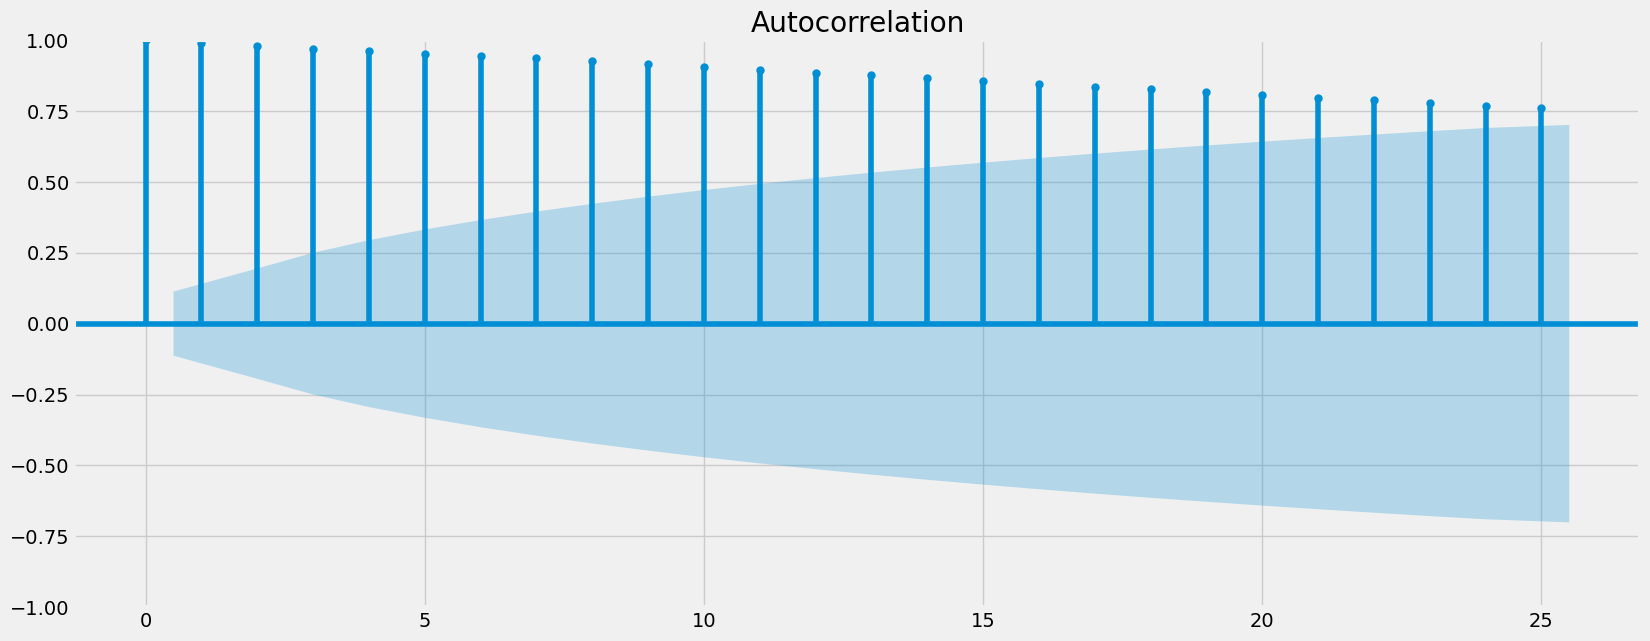

In [131]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_2)
plt.show()

In [132]:
data_diff = data_2 - data_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [133]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [134]:
data_diff.head()

,Value
datetime,
1947-04-01,-5.426
1947-07-01,-4.190
1947-10-01,31.674
1948-01-01,30.934
1948-04-01,34.457


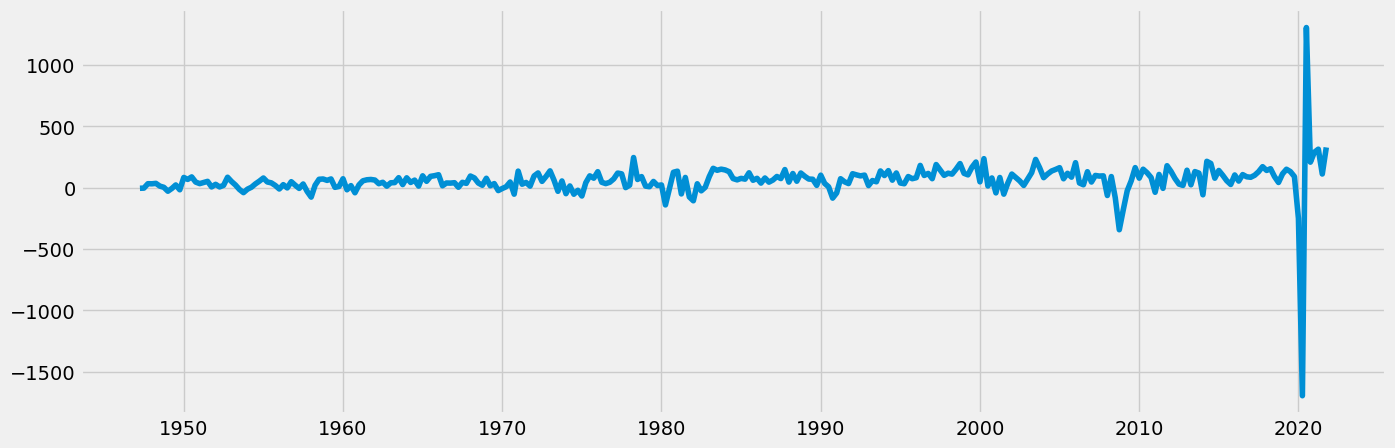

In [135]:
# Check what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [136]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -19.402081
p-value                          0.000000
Number of Lags Used              0.000000
Number of Observations Used    298.000000
Critical Value (1%)             -3.452486
Critical Value (5%)             -2.871288
Critical Value (10%)            -2.571964
dtype: float64


# Results

Null hyptheses = the time series is non-stationary. 
The test statistic is smaller than the critical value 5%, therefore we can reject the null hypothesis, proving the 
hypothesis that the time series is stationary.
The p-value is below 0.05, therefore the result is 'significant.'
This means there isn't a unit root in the data, and the data is stationary.

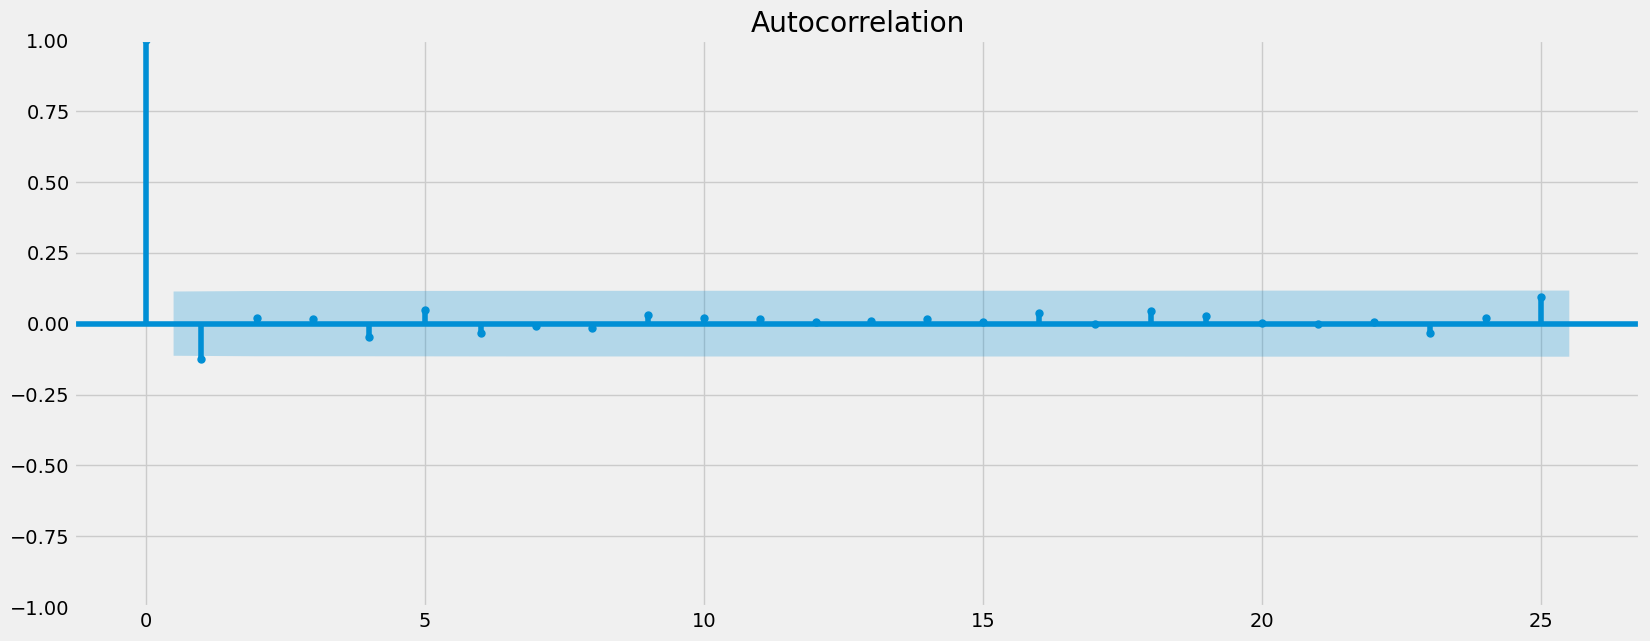

In [139]:
plot_acf(data_diff)
plt.show()